## Linear Programming - Menentukan Buku Apa Saja yang Harus dibaca

Berikut ini Contoh Membangun Program Linier dalam Python dengan modul PULP.

Rumusan Masalah: Anda ingin membaca buku per tahun dengan jumlah buku yang maksimal. Namun, paling-paling Anda hanya bisa membaca selama 5 jam per minggu. Seperti apa daftar bacaan Anda ? jika Anda ingin membahas sebagian besar Daftarnya tersebut dari Daftar  Penjualan Terbaik New York Times

** Dengan asumsi bahwa kecepatan membaca rata-rata Pembaca rata-rata membaca prosa dengan kecepatan sekitar 250-300 kata per menit, yang kira-kira sama dengan sekitar satu halaman per menit, kami menganggap 60 halaman / jam adalah kecepatan biasa.

- Tujuan: Memaksimalkan Jumlah Buku yang Dibaca. (Objective function)

- Bentuk LP: Maksimalisasi

- Variabel Keputusan: Variabel Biner apakah kita harus membaca buku atau tidak. (Decision Variables)

- Batasan: Jumlah Waktu Terbatas yang tersedia untuk membaca buku per minggu (Constrains)


Sumber : https://github.com/AnnaNican/optimizers

In [1]:
#memasukan modul yang digunakan
import warnings; warnings.simplefilter('ignore')
import numpy as np
import pandas as pd
import re 
import matplotlib.pyplot as plt
%matplotlib inline

from pulp import *

### Cara Mendapatkan Data

Ada beberapa situs web di mana orang dapat menemukan koleksi bacaan inspirasi setiap hari. Dataset dari masalah ini diambil dari Daftar Buku Terlaris Goodreads New York Times 
https://www.goodreads.com/list/show/83612.NY_Times_Fiction_Best_Sellers_2015

### Memahami Dataset

Dataset berisi:

- Nama Buku
- Penulis
- Peringkat Goodreads
- Skor Goodreads
- Jumlah halaman

In [2]:
#membuka data 
df = open("goodreads_bestsellers.csv")
df

<_io.TextIOWrapper name='goodreads_bestsellers.csv' mode='r' encoding='cp1252'>

In [3]:
#membaca dan melihat 5 data pertama
data = pd.read_csv("goodreads_bestsellers.csv", encoding='cp1252')
data.head()

,_position,book_name,goodreads_score,author,rating,url,my_column/_source,rating.1,total_ratings,pages
0,1,All the Light We Cannot See,3288,Anthony Doerr,"4.29 of 5 stars 4.29 avg rating „ 179,342 ratings",https://www.goodreads.com/book/show/18143977-a...,/book/show/18143977-all-the-light-we-cannot-see,4.29,179342,530
1,2,The Fault in Our Stars,2471,John Green,"4.36 of 5 stars 4.36 avg rating „ 1,577,550 ra...",https://www.goodreads.com/book/show/11870085-t...,/book/show/11870085-the-fault-in-our-stars,4.36,1577550,313
2,3,The Nightingale,2196,Kristin Hannah,"4.54 of 5 stars 4.54 avg rating „ 52,099 ratings",https://www.goodreads.com/book/show/21853621-t...,/book/show/21853621-the-nightingale,4.54,52099,438
3,4,The Girl on the Train,2188,Paula Hawkins,"3.86 of 5 stars 3.86 avg rating „ 282,985 ratings",https://www.goodreads.com/book/show/22557272-t...,/book/show/22557272-the-girl-on-the-train,3.86,282985,323
4,5,Gone Girl,1756,Gillian Flynn,"3.98 of 5 stars 3.98 avg rating „ 1,083,869 ra...",https://www.goodreads.com/book/show/19288043-g...,/book/show/19288043-gone-girl,3.98,1083869,422


In [4]:
#melihat banyaknya destinasi yang ada
print("Daftar Nama Tempat Destinasi : ", data['book_name'].unique())
print('='*100)
print("Jumlah Destinansi yang ada : ", len(data['book_name'].unique()))

Daftar Nama Tempat Destinasi :  ['All the Light We Cannot See' 'The Fault in Our Stars' 'The Nightingale'
 'The Girl on the Train' 'Gone Girl' 'Orphan Train' 'The Goldfinch'
 'Gray Mountain' 'Big Little Lies' 'The Invention of Wings'
 'Me Before You' 'The Escape (John Puller, #3)' "Sarah's Key"
 'Before I Go' 'A Spool of Blue Thread' "The Husband's Secret"
 'As Chimney Sweepers Come to Dust (Flavia de Luce, #7)' 'Revival'
 'Edge of Eternity (The Century Trilogy, #3)' 'Leaving Time'
 'Sycamore Row (Jake Brigance, #2)' 'Station Eleven'
 'Be Careful What You Wish For (The Clifton Chronicles #4)'
 'Memory Man (Amos Decker, #1)' 'The Burning Room (Harry Bosch, #19)'
 'Obsession in Death (In Death, #40)'
 'Full Force and Effect (Jack Ryan, #10)' 'What Alice Forgot'
 'The Bone Clocks' 'Last to Die (Rizzoli & Isles, #10)'
 'First Frost (Waverley Family, #2)'
 'Somewhere Safe with Somebody Good (Mitford Years, #10)'
 'The Rosie Effect (Don Tillman, #2)'
 'Mightier Than the Sword (The Clifton Ch

In [5]:
#melihat info data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 10 columns):
_position            82 non-null int64
book_name            82 non-null object
goodreads_score      82 non-null int64
author               82 non-null object
rating               82 non-null object
url                  82 non-null object
my_column/_source    82 non-null object
rating.1             82 non-null float64
total_ratings        82 non-null int64
pages                82 non-null int64
dtypes: float64(1), int64(4), object(5)
memory usage: 6.5+ KB


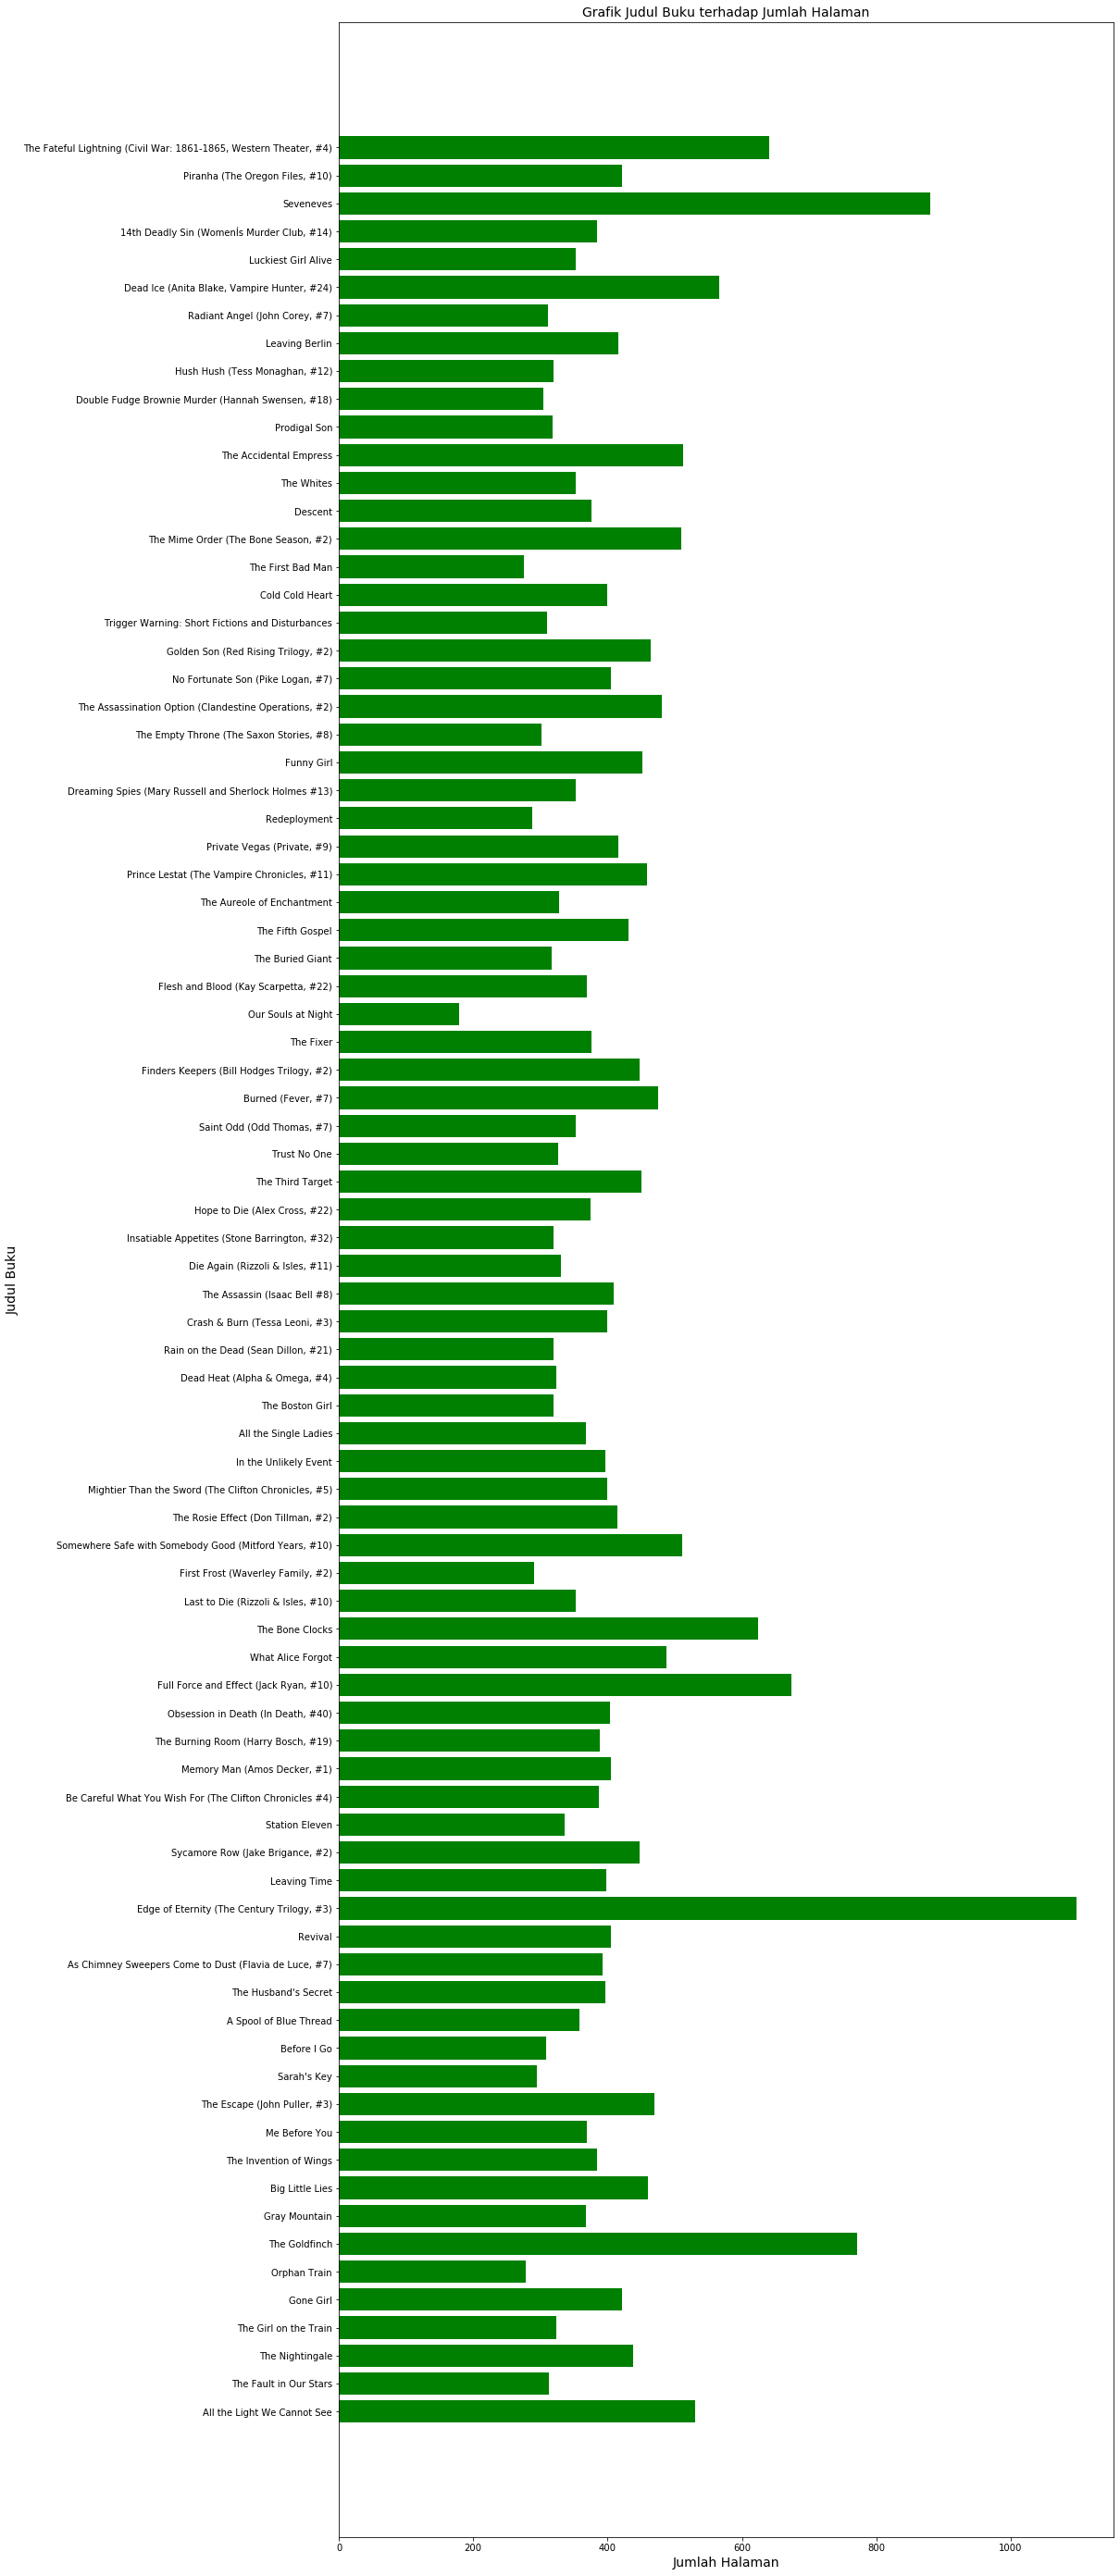

In [6]:
#membuat grafik destinasi terhadap biaya
fig = plt.figure(figsize=(15,50))

x1 = data['book_name']
y = data['pages']

plt.barh(x1, y, color='green')
plt.title("Grafik Judul Buku terhadap Jumlah Halaman", fontsize = 14)
plt.ylabel("Judul Buku", fontsize = 14)
plt.xlabel("Jumlah Halaman", fontsize = 14)
plt.show()

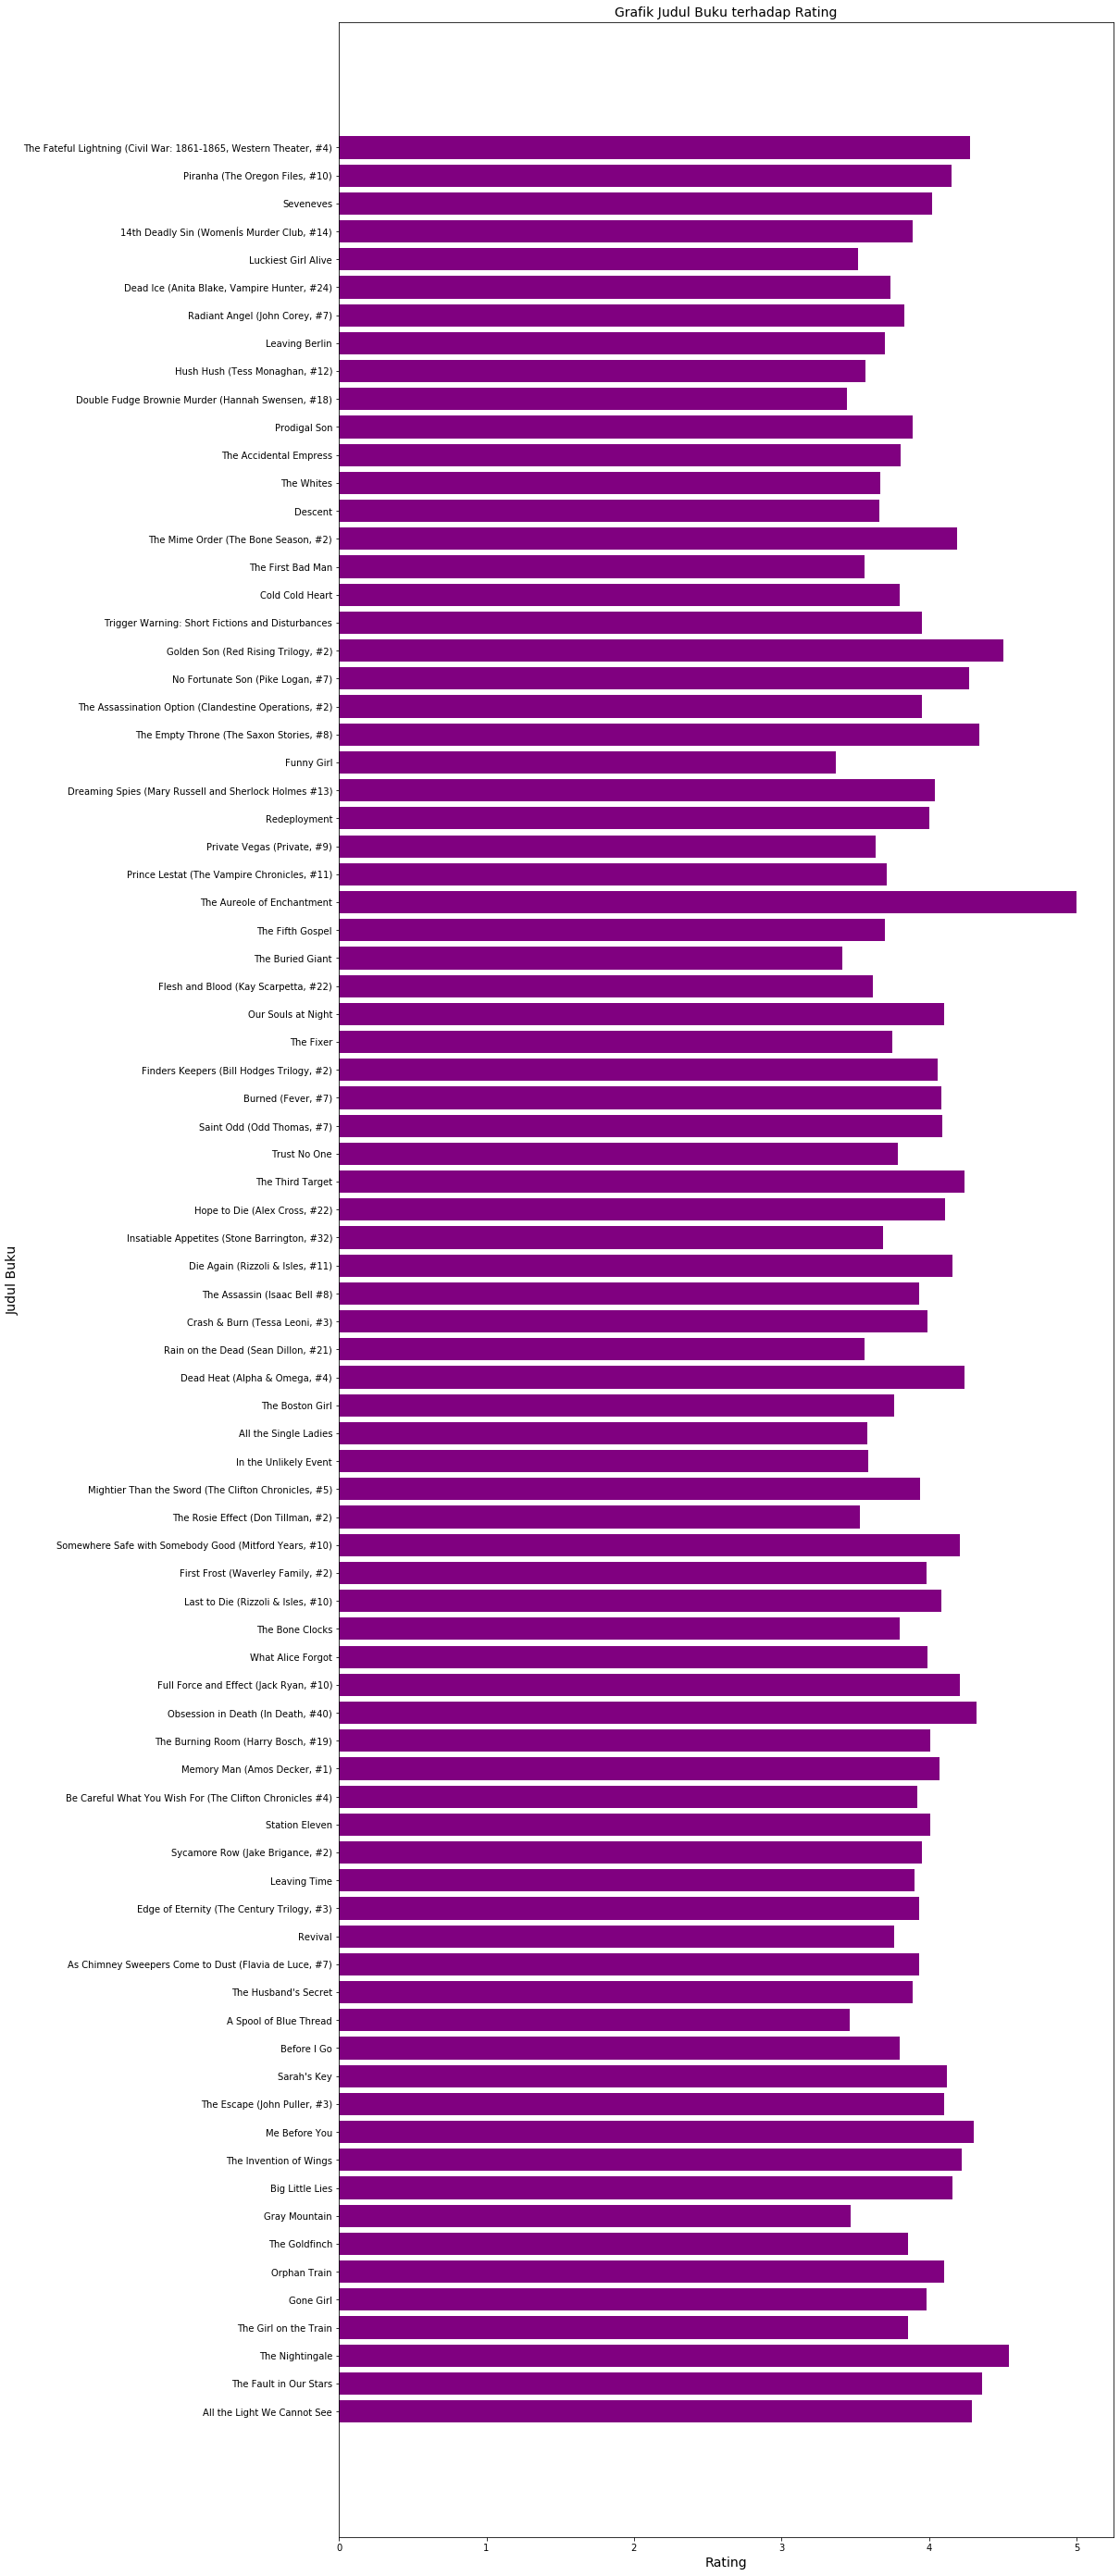

In [7]:
#membuat grafik durasi terhadap biaya
fig = plt.figure(figsize=(15,50))

x2 = data['book_name']
y2 = data['rating.1']

plt.barh(x2, y2, color='purple')
plt.title("Grafik Judul Buku terhadap Rating", fontsize = 14)
plt.xlabel("Rating", fontsize = 14)
plt.ylabel("Judul Buku", fontsize = 14)
plt.show()

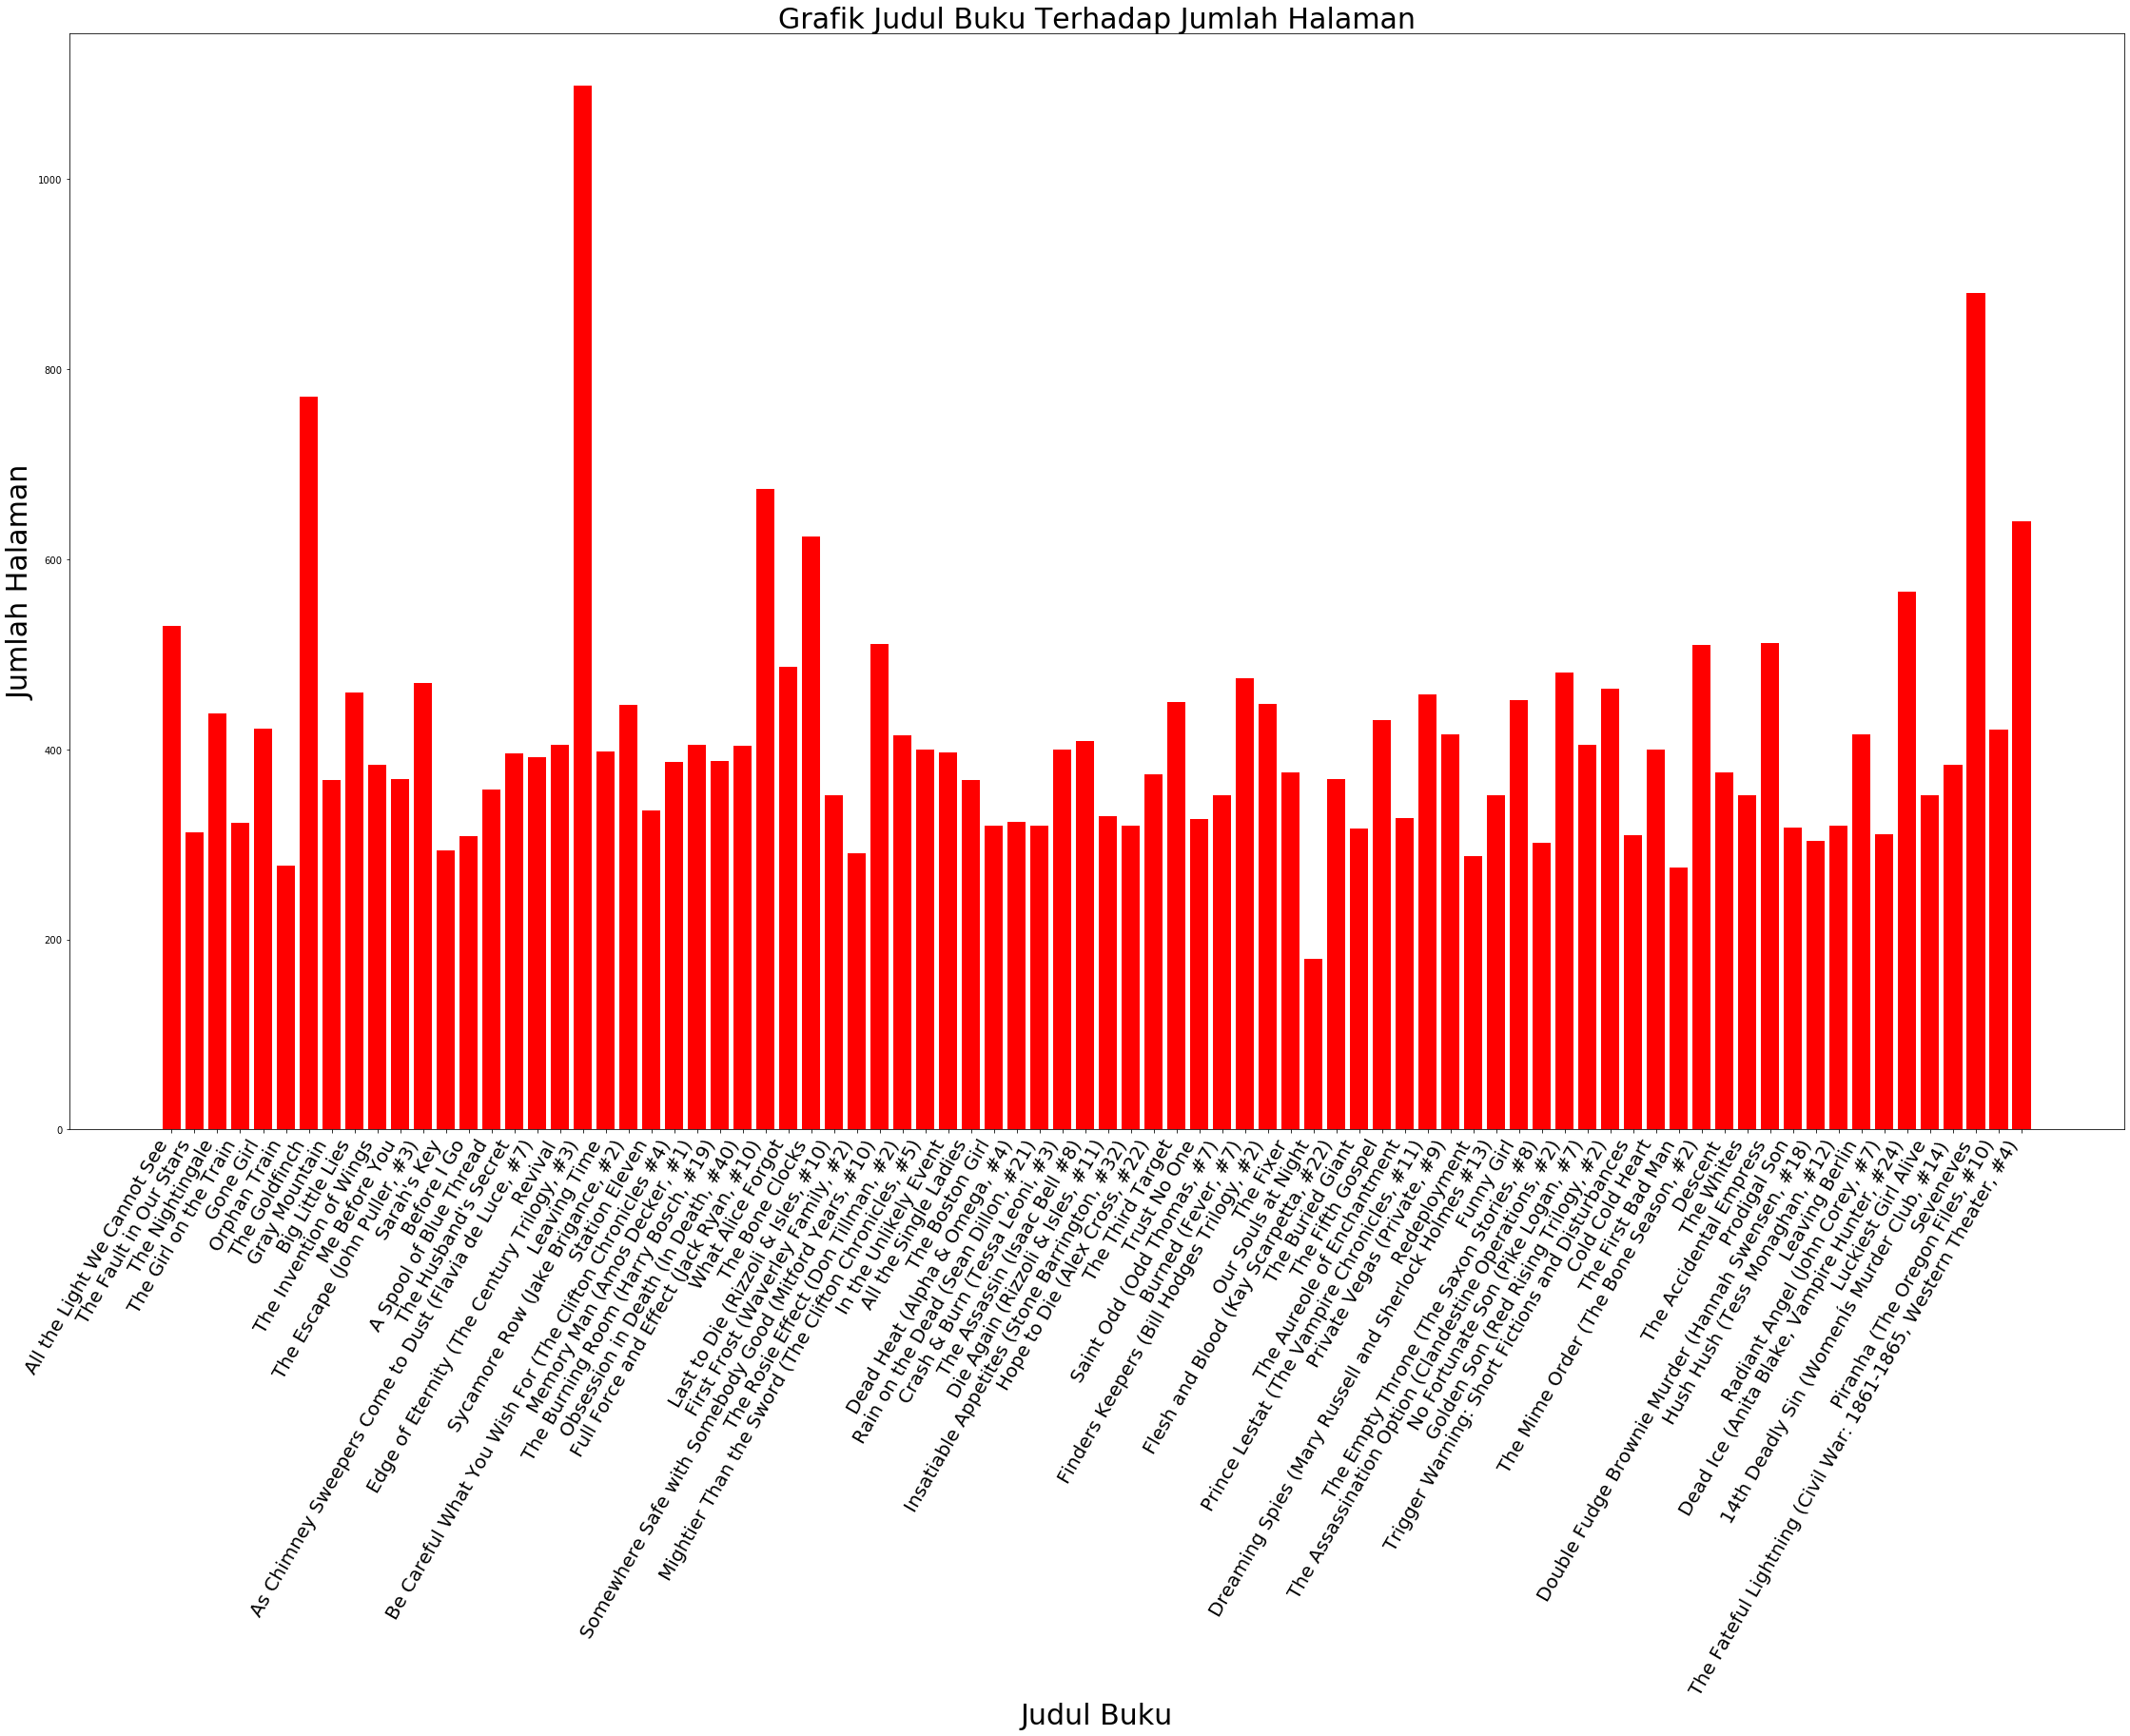

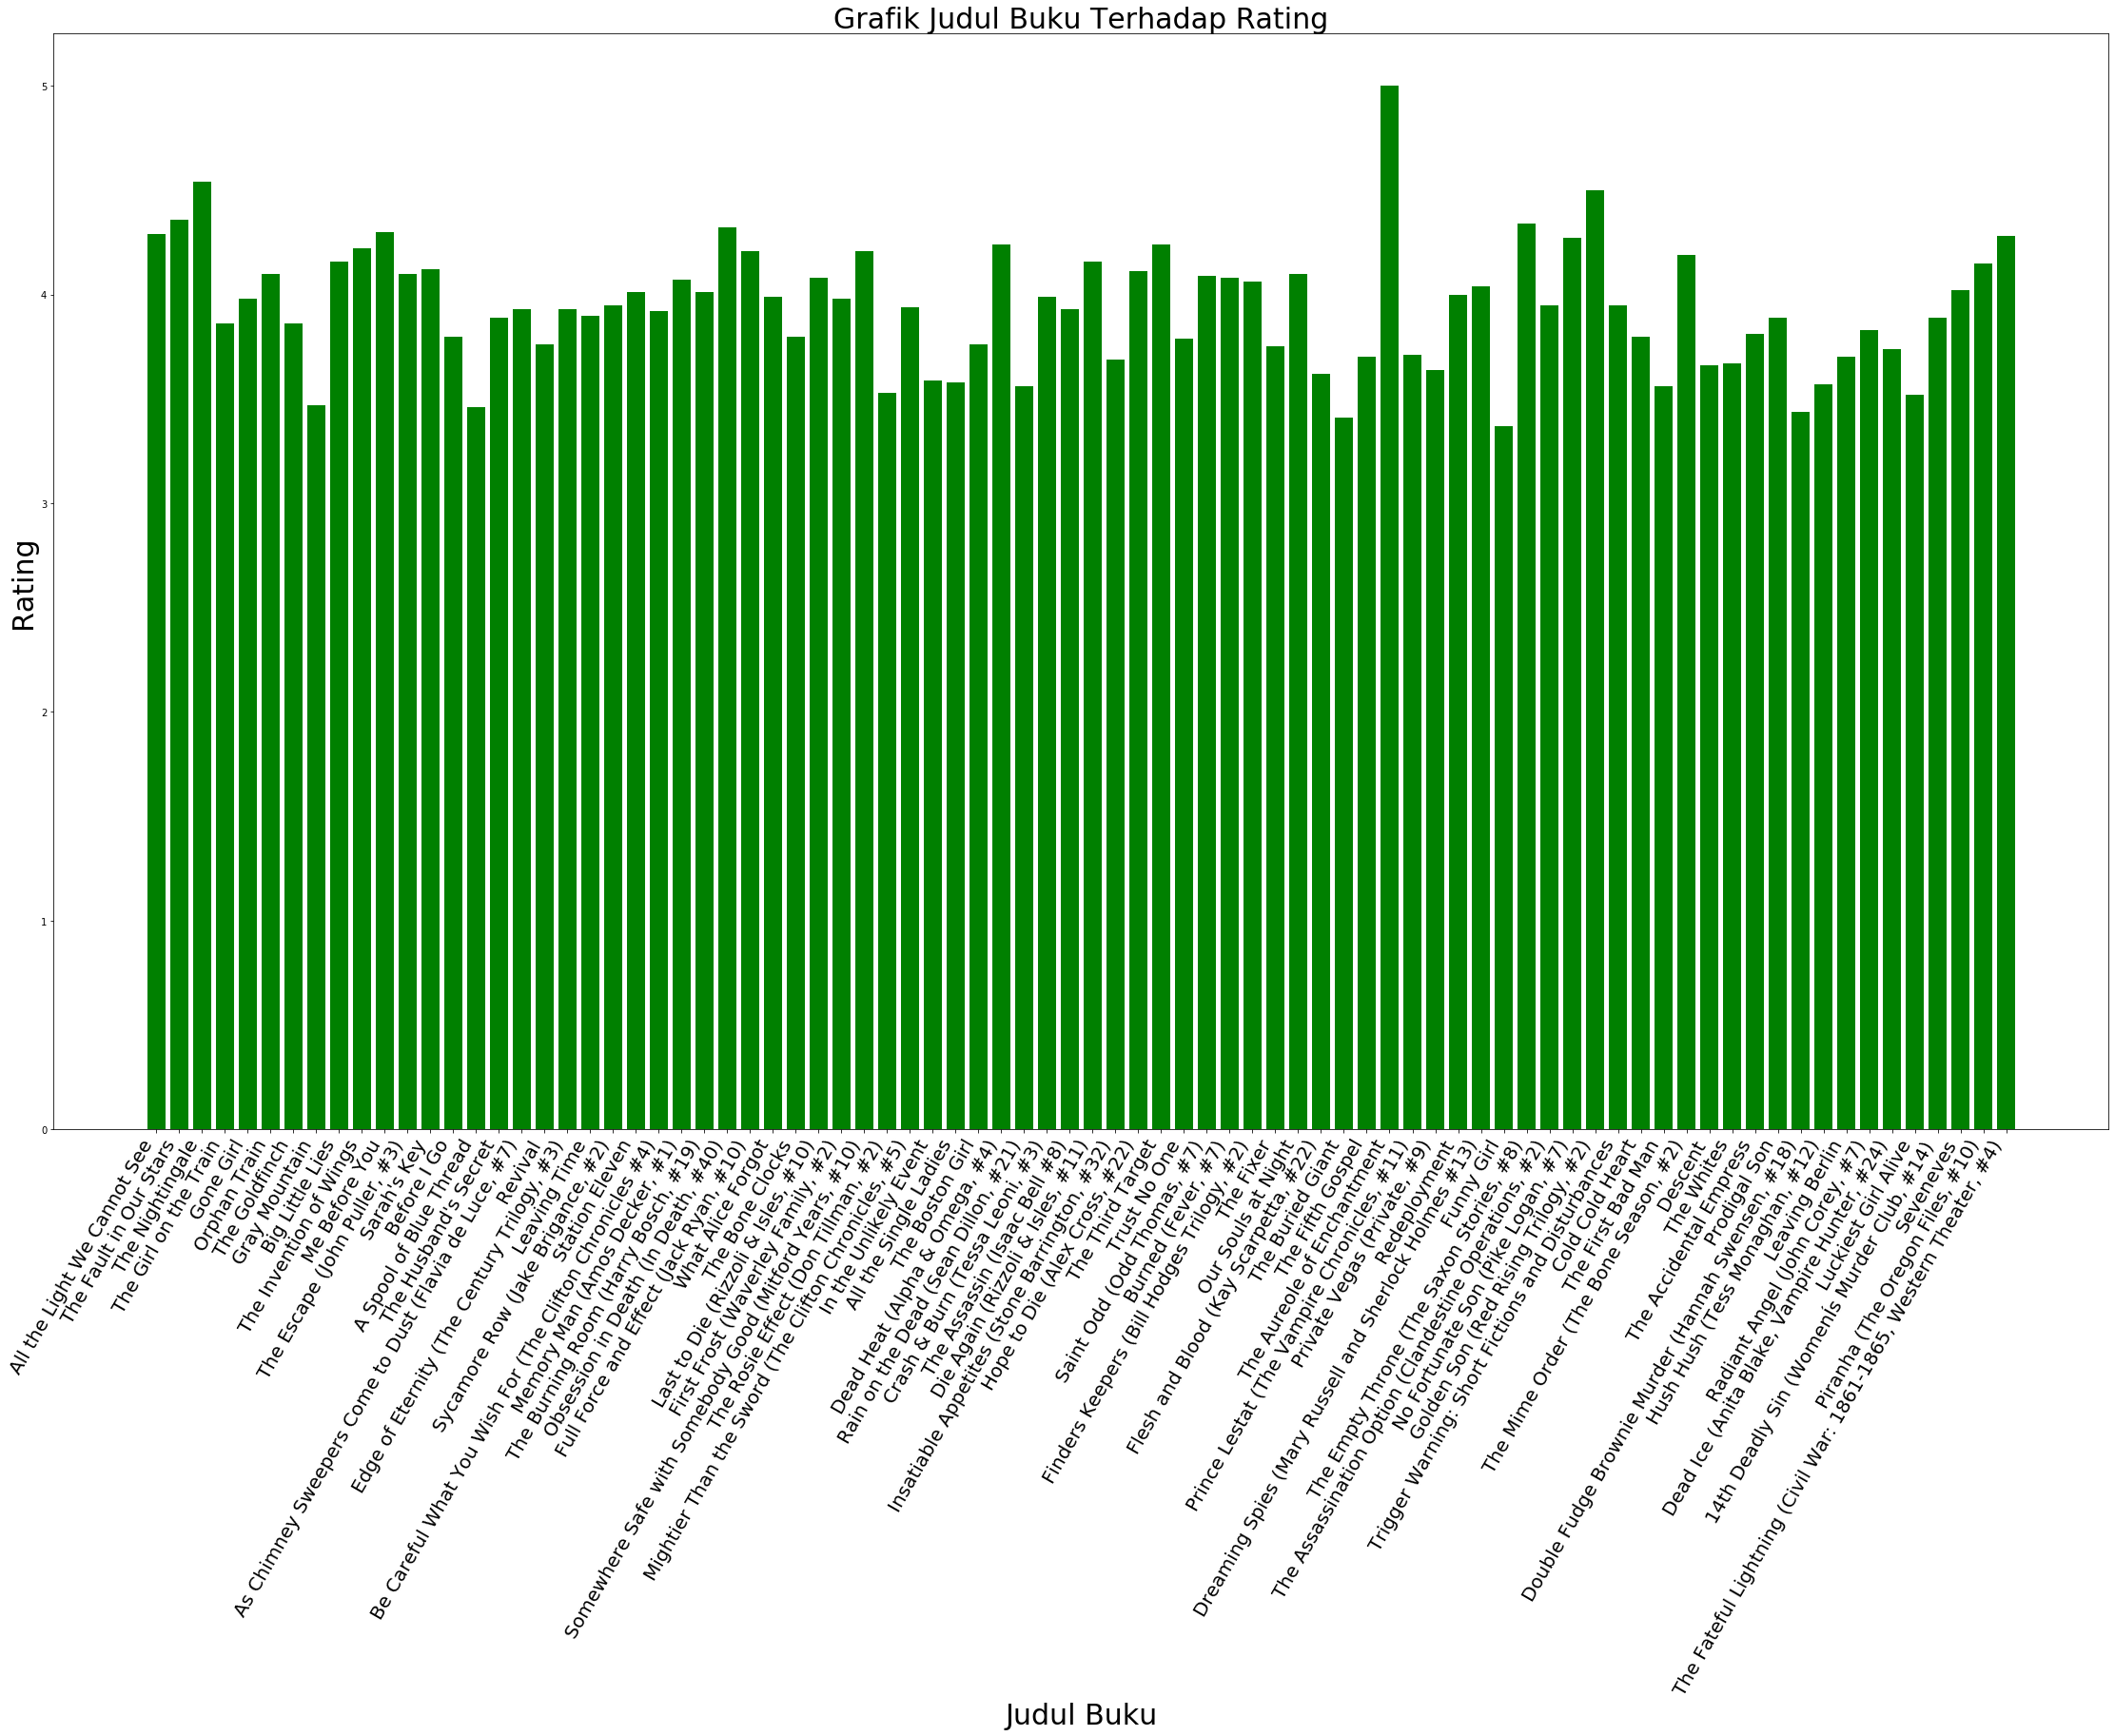

In [8]:
#Grafik judul buku terhadap julah halaman

#membuat list nomor dari 0-81
d = np.arange(82)

#membuat list judul buku
judul_buku = data['book_name'].unique()
judul_buku = judul_buku.tolist()

#membuat frame dengan ukuran [-0.5,1,1,1.5]
plt.axes([-0.5,1,5,4]) #left, bottom, width, hight

#membuat barchart 1
plt.bar(x1,y, color = 'red', linewidth = 10)
plt.ylabel("Jumlah Halaman", fontsize=30)
plt.xlabel("Judul Buku", fontsize=30)
plt.xticks(d, judul_buku, rotation = 60, horizontalalignment='right', fontsize=20)
plt.title("Grafik Judul Buku Terhadap Jumlah Halaman", fontsize=30)
plt.show()

#membuat pembatas
print('='*125)

#grafik judul buku terhadap rating
#membuat frame dengan ukuran [0.65,1,1,1.5]
plt.axes([-0.5,1,5,4])

#membuat barchart 2
plt.bar(x2, y2, color = 'green', linewidth = 10)
plt.ylabel("Rating", fontsize=30)
plt.xlabel("Judul Buku", fontsize=30)
plt.xticks(d, judul_buku, rotation = 60, horizontalalignment='right', fontsize=20)
plt.title("Grafik Judul Buku Terhadap Rating", fontsize=30)
plt.show()

### Menyiapkan Bahan Untuk Proses Linear Programming (LP):

    1. Menentukan Objek LP
    2. Membuat Variabel Keputusan
    3. Menentukan Fungsi Objektif atau Fungsi Sasaran
    4. Menentukan Batasan atau Constrain

### 1. Menentukan Objek LP

   Variabel peluang_jawaban dibuat untuk berisi formulasi, dan parameter yang biasa dimasukan ke dalam LpProblem.

In [9]:
#membuat objek LP
#atur sebagai masalah minimisasi -> karena kita ingin meminimalkan biaya 

peluang_jawaban = pulp.LpProblem('Read_Best_sellers', pulp.LpMaximize)

### 2. Membuat Variabel Keputusan

In [10]:
decision_variables = []
for rownum, row in data.iterrows():
    variable = str('x' + str(rownum))
    variable = pulp.LpVariable(str(variable), lowBound = 0, upBound = 1, cat= 'Integer') #make variables binary
    decision_variables.append(variable)

print ("Jumlah Total Variabel Keputusan: ", len(decision_variables))
print ("Array dengan Variabel Keputusan:", decision_variables)

Jumlah Total Variabel Keputusan:  82
Array dengan Variabel Keputusan: [x0, x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12, x13, x14, x15, x16, x17, x18, x19, x20, x21, x22, x23, x24, x25, x26, x27, x28, x29, x30, x31, x32, x33, x34, x35, x36, x37, x38, x39, x40, x41, x42, x43, x44, x45, x46, x47, x48, x49, x50, x51, x52, x53, x54, x55, x56, x57, x58, x59, x60, x61, x62, x63, x64, x65, x66, x67, x68, x69, x70, x71, x72, x73, x74, x75, x76, x77, x78, x79, x80, x81]


### 3. Menentukan Fungsi Tujuan atau Fungsi Sasaran: Memaksimalkan jumlah buku yang dibaca

Variabel peluang_jawaban, sekarang mulai mengumpulkan data permasalahan tersebut dengan operator "+=". Fungsi tujuan secara logis dimasukkan terlebih dahulu, dengan koma yang penting, di akhir pernyataan hasil yang menjelaskan seperti apa fungsi tujuan ini:

In [11]:
total_books = ""
for i, book in enumerate(decision_variables):
    total_books += book

peluang_jawaban += total_books
print ("Fungsi Optimasi Untuk Biaya: ", total_books)

Fungsi Optimasi Untuk Biaya:  x0 + x1 + x10 + x11 + x12 + x13 + x14 + x15 + x16 + x17 + x18 + x19 + x2 + x20 + x21 + x22 + x23 + x24 + x25 + x26 + x27 + x28 + x29 + x3 + x30 + x31 + x32 + x33 + x34 + x35 + x36 + x37 + x38 + x39 + x4 + x40 + x41 + x42 + x43 + x44 + x45 + x46 + x47 + x48 + x49 + x5 + x50 + x51 + x52 + x53 + x54 + x55 + x56 + x57 + x58 + x59 + x6 + x60 + x61 + x62 + x63 + x64 + x65 + x66 + x67 + x68 + x69 + x7 + x70 + x71 + x72 + x73 + x74 + x75 + x76 + x77 + x78 + x79 + x8 + x80 + x81 + x9


### 4. Menentukan Batasan atau Constrain : Kami memiliki Jumlah Waktu yang tetap untuk membaca buku dan Memperbaiki Kecepatan Membaca.

In [12]:
hours_week_read = 5
pages_per_hour = 60

In [13]:
#create constrains - there are only 365 days
total_pages_needs_to_read = ""
for rownum, row in data.iterrows():
    for i, schedule in enumerate(decision_variables):
        if rownum == i:
            formula = row['pages']*schedule
            total_pages_needs_to_read += formula

total_pages_can_read = 52*hours_week_read*pages_per_hour

peluang_jawaban += (total_pages_needs_to_read == total_pages_can_read)
print("Fungsi Optimasi untuk Waktu Liburan", total_pages_needs_to_read)

Fungsi Optimasi untuk Waktu Liburan 530*x0 + 313*x1 + 369*x10 + 470*x11 + 294*x12 + 309*x13 + 358*x14 + 396*x15 + 392*x16 + 405*x17 + 1098*x18 + 398*x19 + 438*x2 + 447*x20 + 336*x21 + 387*x22 + 405*x23 + 388*x24 + 404*x25 + 674*x26 + 487*x27 + 624*x28 + 352*x29 + 323*x3 + 291*x30 + 511*x31 + 415*x32 + 400*x33 + 397*x34 + 368*x35 + 320*x36 + 324*x37 + 320*x38 + 400*x39 + 422*x4 + 409*x40 + 330*x41 + 320*x42 + 374*x43 + 450*x44 + 327*x45 + 352*x46 + 475*x47 + 448*x48 + 376*x49 + 278*x5 + 179*x50 + 369*x51 + 317*x52 + 431*x53 + 328*x54 + 458*x55 + 416*x56 + 288*x57 + 352*x58 + 452*x59 + 771*x6 + 302*x60 + 481*x61 + 405*x62 + 464*x63 + 310*x64 + 400*x65 + 276*x66 + 510*x67 + 376*x68 + 352*x69 + 368*x7 + 512*x70 + 318*x71 + 304*x72 + 320*x73 + 416*x74 + 311*x75 + 566*x76 + 352*x77 + 384*x78 + 880*x79 + 460*x8 + 421*x80 + 640*x81 + 384*x9


## Melihat Bentuk dari Hasil Proses Linear Programming

In [14]:
print(peluang_jawaban)
peluang_jawaban.writeLP("Read_Best_sellers.lp")

Read_Best_sellers:
MAXIMIZE
1*x0 + 1*x1 + 1*x10 + 1*x11 + 1*x12 + 1*x13 + 1*x14 + 1*x15 + 1*x16 + 1*x17 + 1*x18 + 1*x19 + 1*x2 + 1*x20 + 1*x21 + 1*x22 + 1*x23 + 1*x24 + 1*x25 + 1*x26 + 1*x27 + 1*x28 + 1*x29 + 1*x3 + 1*x30 + 1*x31 + 1*x32 + 1*x33 + 1*x34 + 1*x35 + 1*x36 + 1*x37 + 1*x38 + 1*x39 + 1*x4 + 1*x40 + 1*x41 + 1*x42 + 1*x43 + 1*x44 + 1*x45 + 1*x46 + 1*x47 + 1*x48 + 1*x49 + 1*x5 + 1*x50 + 1*x51 + 1*x52 + 1*x53 + 1*x54 + 1*x55 + 1*x56 + 1*x57 + 1*x58 + 1*x59 + 1*x6 + 1*x60 + 1*x61 + 1*x62 + 1*x63 + 1*x64 + 1*x65 + 1*x66 + 1*x67 + 1*x68 + 1*x69 + 1*x7 + 1*x70 + 1*x71 + 1*x72 + 1*x73 + 1*x74 + 1*x75 + 1*x76 + 1*x77 + 1*x78 + 1*x79 + 1*x8 + 1*x80 + 1*x81 + 1*x9 + 0
SUBJECT TO
_C1: 530 x0 + 313 x1 + 369 x10 + 470 x11 + 294 x12 + 309 x13 + 358 x14
 + 396 x15 + 392 x16 + 405 x17 + 1098 x18 + 398 x19 + 438 x2 + 447 x20
 + 336 x21 + 387 x22 + 405 x23 + 388 x24 + 404 x25 + 674 x26 + 487 x27
 + 624 x28 + 352 x29 + 323 x3 + 291 x30 + 511 x31 + 415 x32 + 400 x33
 + 397 x34 + 368 x35 + 320 x36

## Melihat Hasil Optimasi Aktual (Sebenarnya)

In [15]:
optimization_result = peluang_jawaban.solve()

assert optimization_result == pulp.LpStatusOptimal

#melihat status 
print("Status:", LpStatus[peluang_jawaban.status])

#melihat solusi optimal
print("Solusi Optimal dari Soal: ", value(peluang_jawaban.objective))

#melihat variabel keputusan 
print("Individual decision_variables: ")
for v in peluang_jawaban.variables():
    print(v.name, "=", v.varValue)

Status: Optimal
Solusi Optimal dari Soal:  46.0
Individual decision_variables: 
x0 = 0.0
x1 = 1.0
x10 = 1.0
x11 = 0.0
x12 = 1.0
x13 = 1.0
x14 = 1.0
x15 = 0.0
x16 = 1.0
x17 = 0.0
x18 = 0.0
x19 = 0.0
x2 = 0.0
x20 = 0.0
x21 = 1.0
x22 = 1.0
x23 = 0.0
x24 = 1.0
x25 = 1.0
x26 = 0.0
x27 = 0.0
x28 = 0.0
x29 = 1.0
x3 = 1.0
x30 = 1.0
x31 = 0.0
x32 = 0.0
x33 = 1.0
x34 = 0.0
x35 = 1.0
x36 = 1.0
x37 = 1.0
x38 = 1.0
x39 = 0.0
x4 = 0.0
x40 = 0.0
x41 = 1.0
x42 = 1.0
x43 = 1.0
x44 = 0.0
x45 = 1.0
x46 = 1.0
x47 = 0.0
x48 = 0.0
x49 = 1.0
x5 = 1.0
x50 = 1.0
x51 = 1.0
x52 = 1.0
x53 = 0.0
x54 = 1.0
x55 = 0.0
x56 = 0.0
x57 = 1.0
x58 = 1.0
x59 = 0.0
x6 = 0.0
x60 = 1.0
x61 = 0.0
x62 = 1.0
x63 = 0.0
x64 = 1.0
x65 = 1.0
x66 = 1.0
x67 = 0.0
x68 = 1.0
x69 = 1.0
x7 = 1.0
x70 = 0.0
x71 = 1.0
x72 = 1.0
x73 = 1.0
x74 = 0.0
x75 = 1.0
x76 = 0.0
x77 = 1.0
x78 = 1.0
x79 = 0.0
x8 = 0.0
x80 = 0.0
x81 = 0.0
x9 = 1.0


## Menyimpan Hasil dalam Bentuk DataFrame

Menggunakan no variabel/baris sebagai indeks untuk menambahkan hasilnya kembali ke dataset awal.

In [16]:
#membuat wadah atau tempat
variable_name = []
variable_value = []

#memanggil nama variabel dengan nilainya 
#misalnya x10 nilainya 100
for v in peluang_jawaban.variables():
    variable_name.append(v.name)
    variable_value.append(v.varValue)

#menyimpan hasil nama variabel dengan nilainya yang sudah dipanggil ke dalam dataFrame 
df = pd.DataFrame({'variable': variable_name, 'value': variable_value})

#memisahkan nomor variabel dengan nama variabelnya dari kolom 'variable'
#misalnya x10 menjadi x 10 (x spasi 10) 
for rownum, row in df.iterrows():
    value = re.findall(r'(\d+)', row['variable']) #dari ['x10'] menjadi ['10'] 
    df.loc[rownum, 'variable'] = int(value[0]) #dari ['10'] menjadi 10 (index 10) dan menyimpannya dalam bentuk dataFrame

#mengurutkan dataFrame berdasarkan kolom 'variable'
df = df.sort_index(by='variable')

#menggabungkan df hasil sorting di atas ke dalam data awal
for rownum, row in data.iterrows():
    for results_rownum, results_row in df.iterrows():
        if rownum == results_row['variable']:
            data.loc[rownum, 'decision'] = results_row['value'] #membuat kolom decision dan memasukan nilai barisnya dengan hasil nilai dari proses LP

#melihat 10 data pertama
data.head(10)

,_position,book_name,goodreads_score,author,rating,url,my_column/_source,rating.1,total_ratings,pages,decision
0,1,All the Light We Cannot See,3288,Anthony Doerr,"4.29 of 5 stars 4.29 avg rating „ 179,342 ratings",https://www.goodreads.com/book/show/18143977-a...,/book/show/18143977-all-the-light-we-cannot-see,4.29,179342,530,0.0
1,2,The Fault in Our Stars,2471,John Green,"4.36 of 5 stars 4.36 avg rating „ 1,577,550 ra...",https://www.goodreads.com/book/show/11870085-t...,/book/show/11870085-the-fault-in-our-stars,4.36,1577550,313,1.0
2,3,The Nightingale,2196,Kristin Hannah,"4.54 of 5 stars 4.54 avg rating „ 52,099 ratings",https://www.goodreads.com/book/show/21853621-t...,/book/show/21853621-the-nightingale,4.54,52099,438,0.0
3,4,The Girl on the Train,2188,Paula Hawkins,"3.86 of 5 stars 3.86 avg rating „ 282,985 ratings",https://www.goodreads.com/book/show/22557272-t...,/book/show/22557272-the-girl-on-the-train,3.86,282985,323,1.0
4,5,Gone Girl,1756,Gillian Flynn,"3.98 of 5 stars 3.98 avg rating „ 1,083,869 ra...",https://www.goodreads.com/book/show/19288043-g...,/book/show/19288043-gone-girl,3.98,1083869,422,0.0
5,6,Orphan Train,1581,Christina Baker Kline,"4.1 of 5 stars 4.10 avg rating „ 150,431 ratings",https://www.goodreads.com/book/show/15818107-o...,/book/show/15818107-orphan-train,4.10,150431,278,1.0
6,7,The Goldfinch,1485,Donna Tartt,"3.86 of 5 stars 3.86 avg rating „ 283,030 ratings",https://www.goodreads.com/book/show/17333223-t...,/book/show/17333223-the-goldfinch,3.86,283030,771,0.0
7,8,Gray Mountain,1191,John Grisham,"3.47 of 5 stars 3.47 avg rating „ 30,770 ratings",https://www.goodreads.com/book/show/20707959-g...,/book/show/20707959-gray-mountain,3.47,30770,368,1.0
8,9,Big Little Lies,1187,Liane Moriarty,"4.16 of 5 stars 4.16 avg rating „ 132,839 ratings",https://www.goodreads.com/book/show/19486412-b...,/book/show/19486412-big-little-lies,4.16,132839,460,0.0
9,10,The Invention of Wings,1165,Sue Monk Kidd,"4.22 of 5 stars 4.22 avg rating „ 117,127 ratings",https://www.goodreads.com/book/show/18079776-t...,/book/show/18079776-the-invention-of-wings,4.22,117127,384,1.0


In [17]:
#Melihat hasil variabel yang optimal dalam hal ini paket liburan mana yang seharusnya dipilih
data[data['decision'] == 1]

,_position,book_name,goodreads_score,author,rating,url,my_column/_source,rating.1,total_ratings,pages,decision
1,2,The Fault in Our Stars,2471,John Green,"4.36 of 5 stars 4.36 avg rating „ 1,577,550 ra...",https://www.goodreads.com/book/show/11870085-t...,/book/show/11870085-the-fault-in-our-stars,4.36,1577550,313,1.0
3,4,The Girl on the Train,2188,Paula Hawkins,"3.86 of 5 stars 3.86 avg rating „ 282,985 ratings",https://www.goodreads.com/book/show/22557272-t...,/book/show/22557272-the-girl-on-the-train,3.86,282985,323,1.0
5,6,Orphan Train,1581,Christina Baker Kline,"4.1 of 5 stars 4.10 avg rating „ 150,431 ratings",https://www.goodreads.com/book/show/15818107-o...,/book/show/15818107-orphan-train,4.10,150431,278,1.0
7,8,Gray Mountain,1191,John Grisham,"3.47 of 5 stars 3.47 avg rating „ 30,770 ratings",https://www.goodreads.com/book/show/20707959-g...,/book/show/20707959-gray-mountain,3.47,30770,368,1.0
9,10,The Invention of Wings,1165,Sue Monk Kidd,"4.22 of 5 stars 4.22 avg rating „ 117,127 ratings",https://www.goodreads.com/book/show/18079776-t...,/book/show/18079776-the-invention-of-wings,4.22,117127,384,1.0
10,11,Me Before You,1070,Jojo Moyes,"4.3 of 5 stars 4.30 avg rating „ 234,030 ratings",https://www.goodreads.com/book/show/15507958-m...,/book/show/15507958-me-before-you,4.30,234030,369,1.0
12,13,Sarah's Key,981,Tatiana de Rosnay,"4.12 of 5 stars 4.12 avg rating „ 286,227 ratings",https://www.goodreads.com/book/show/556602.Sar...,/book/show/556602.Sarah_s_Key,4.12,286227,294,1.0
13,14,Before I Go,795,Colleen Oakley,"3.8 of 5 stars 3.80 avg rating „ 5,613 ratings",https://www.goodreads.com/book/show/20871704-b...,/book/show/20871704-before-i-go,3.80,5613,309,1.0
14,15,A Spool of Blue Thread,684,Anne Tyler,"3.46 of 5 stars 3.46 avg rating „ 20,403 ratings",https://www.goodreads.com/book/show/22501028-a...,/book/show/22501028-a-spool-of-blue-thread,3.46,20403,358,1.0
16,17,As Chimney Sweepers Come to Dust (Flavia de Lu...,596,Alan Bradley,"3.93 of 5 stars 3.93 avg rating „ 8,623 ratings",https://www.goodreads.com/book/show/21874813-a...,/book/show/21874813-as-chimney-sweepers-come-t...,3.93,8623,392,1.0


In [18]:
#melihat total buku yang dibaca
len(data[data['decision'] == 1])

46

                            ##Semoga Bermanfaat
                            ##@Raspiani_